  # Time Series data
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Aagam0812/DataMining/blob/main/Assignment9/Timeseries.ipynb)


  Let's start the exploratory data analysis (EDA) on the provided datasets.

  The EDA process will be carried out in the following steps:

* Data Loading: Load the train and test datasets.
* Data Overview: Get a quick overview of the data's structure, columns, and types.
* Data Cleaning: Check for missing values, duplicates, and other inconsistencies.
* Data Visualization: Visualize the distributions, correlations, and patterns in the data.
* Feature Processing: Process and transform features if necessary.
* Feature Selection: Determine the most important features.
* Clustering: Cluster the data points to identify patterns.
* Anomaly Detection: Identify and handle outliers or anomalies.
* Model Selection & training
* Compare with AutoML (like pycaret)

  # Step 1: Data Loading.
   Load the train and test datasets.

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [4]:
import pandas as pd
train_df=pd.read_csv('/content/gdrive/MyDrive/DataMining/DailyDelhiClimateTrain.csv')

test_df = pd.read_csv('/content/gdrive/MyDrive/DataMining/DailyDelhiClimateTest.csv')

# Display the first few rows of each dataset
train_df.head(), test_df.head()

(         date   meantemp   humidity  wind_speed  meanpressure
 0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
 1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
 2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
 3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
 4  2013-01-05   6.000000  86.833333    3.700000   1016.500000,
          date   meantemp   humidity  wind_speed  meanpressure
 0  2017-01-01  15.913043  85.869565    2.743478     59.000000
 1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
 2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
 3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
 4  2017-01-05  18.388889  74.944444    3.300000   1014.333333)

The columns in both the train and test datasets are: date, meantemp, humidity, wind_speed, and meanpressure.

The date column seems to represent the date of the observation, and the rest are numerical features that describe various climate attributes.

  # Step 2: Data Overview
Let's get a quick overview of the data's structure, including the number of rows, columns, data types, and basic statistics for each column.

In [5]:
# Overview of the train dataset
train_overview = train_df.describe(include='all')

# Overview of the test dataset
test_overview = test_df.describe(include='all')

train_overview, test_overview

(              date     meantemp     humidity   wind_speed  meanpressure
 count         1462  1462.000000  1462.000000  1462.000000   1462.000000
 unique        1462          NaN          NaN          NaN           NaN
 top     2013-01-01          NaN          NaN          NaN           NaN
 freq             1          NaN          NaN          NaN           NaN
 mean           NaN    25.495521    60.771702     6.802209   1011.104548
 std            NaN     7.348103    16.769652     4.561602    180.231668
 min            NaN     6.000000    13.428571     0.000000     -3.041667
 25%            NaN    18.857143    50.375000     3.475000   1001.580357
 50%            NaN    27.714286    62.625000     6.221667   1008.563492
 75%            NaN    31.305804    72.218750     9.238235   1014.944901
 max            NaN    38.714286   100.000000    42.220000   7679.333333,
               date    meantemp    humidity  wind_speed  meanpressure
 count          114  114.000000  114.000000  114.0000

 ### Brief overview based on the data's structure and basic statistics for each column:

Train Dataset:

* Number of records: 1,462
* Columns: date, meantemp, humidity, wind_speed, meanpressure
* meantemp: Ranges from 6.00 to 38.71 with a mean of 25.50.
* humidity: Ranges from 13.43 to 100.00 with a mean of 60.77.
* wind_speed: Ranges from 0.00 to 42.22 with a mean of 6.80.
* meanpressure: Ranges from -3.04 to a surprisingly high value of 7679.33,
which might be an outlier or a data entry error. The mean is 1011.10.

Test Dataset:

* Number of records: 114
* Columns: date, meantemp, humidity, wind_speed, meanpressure
* meantemp: Ranges from 11.00 to 34.50 with a mean of 21.71.
* humidity: Ranges from 17.75 to 95.83 with a mean of 56.26.
* wind_speed: Ranges from 1.39 to 19.31 with a mean of 8.14.
* meanpressure: Ranges from 59.00 to 1022.81 with a mean of 1004.04.

  # Step 3: Data Cleaning
In this step, we will:

* Check for missing values.
* Handle any duplicate rows.
* Look for any obvious inconsistencies or anomalies.

In [6]:
# Check for missing values in train and test datasets
missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()

missing_train, missing_test


(date            0
 meantemp        0
 humidity        0
 wind_speed      0
 meanpressure    0
 dtype: int64,
 date            0
 meantemp        0
 humidity        0
 wind_speed      0
 meanpressure    0
 dtype: int64)

There are no missing values in either the train or test datasets, which is great.

In [7]:
# Check for duplicate rows in train and test datasets
duplicates_train = train_df.duplicated().sum()
duplicates_test = test_df.duplicated().sum()

duplicates_train, duplicates_test


(0, 0)

There are no duplicate rows in either the train or test datasets.

The last step in this data cleaning phase is to identify and handle any obvious inconsistencies or anomalies. Given that the meanpressure column in the train dataset had a suspiciously high maximum value, we should investigate this further.

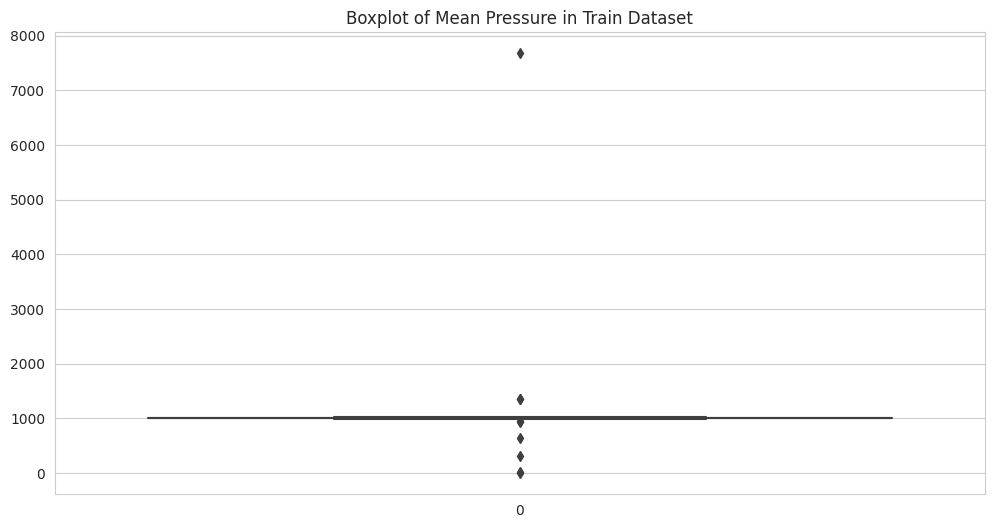

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of the meanpressure column for the train dataset
plt.figure(figsize=(12, 6))
sns.boxplot(train_df['meanpressure'])
plt.title('Boxplot of Mean Pressure in Train Dataset')
plt.show()

The boxplot clearly shows that there are some extreme outliers in the meanpressure column of the train dataset. These extreme values can skew our analysis and models, so they should be addressed.

To handle these outliers, we can employ a common technique: replacing values that are outside of the interquartile range (IQR) with the boundary values. Specifically, values below.

Q1−1.5×IQR will be replaced with Q1−1.5×IQR

Q3+1.5×IQR will be replaced with Q3+1.5×IQR


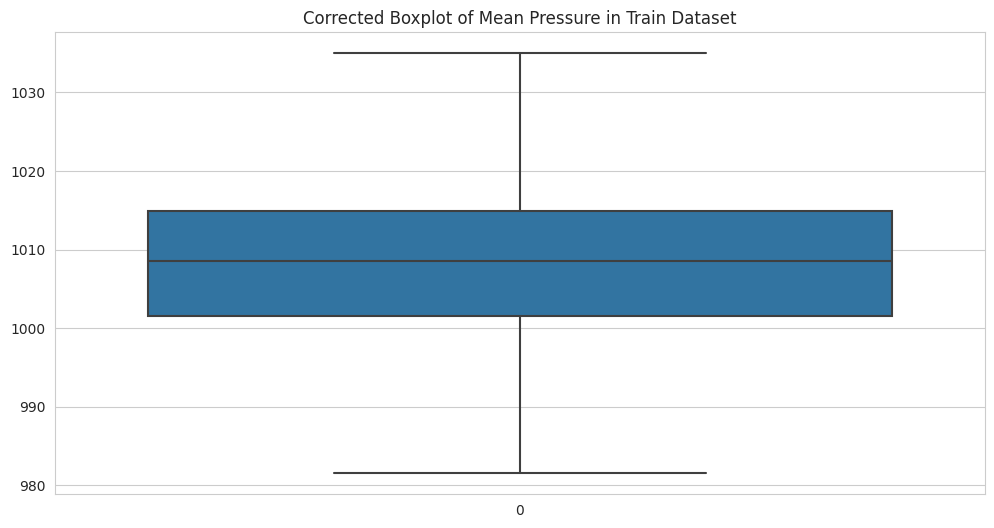

In [9]:
# Calculate the IQR for meanpressure in the train dataset
Q1 = train_df['meanpressure'].quantile(0.25)
Q3 = train_df['meanpressure'].quantile(0.75)
IQR = Q3 - Q1

# Define boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with boundary values
train_df['meanpressure'] = train_df['meanpressure'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Plotting the corrected distribution of the meanpressure column for the train dataset
plt.figure(figsize=(12, 6))
sns.boxplot(train_df['meanpressure'])
plt.title('Corrected Boxplot of Mean Pressure in Train Dataset')
plt.show()


The extreme outliers in the meanpressure column of the train dataset have been corrected. As seen in the updated boxplot, the distribution looks much more reasonable now.

### Addressing Skewness:

Identify and handle skewed features using transformations or other techniques.

In [10]:
# Address Skewness
numeric_features = train_df.select_dtypes(include=[np.number]).columns
skewed_features = train_df[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[abs(skewed_features) > 0.5]
for feature in high_skew.index:
    train_df[feature] = np.log1p(train_df[feature])


  # Step 4: Data Visualization
In this step, we'll visualize the distributions, correlations, and patterns in the data. Visualization provides a deeper understanding of the underlying structures and relationships within the data.

We will:

* Visualize the distribution of each feature.
* Visualize the time series trend for each feature.
* Examine correlations between features.

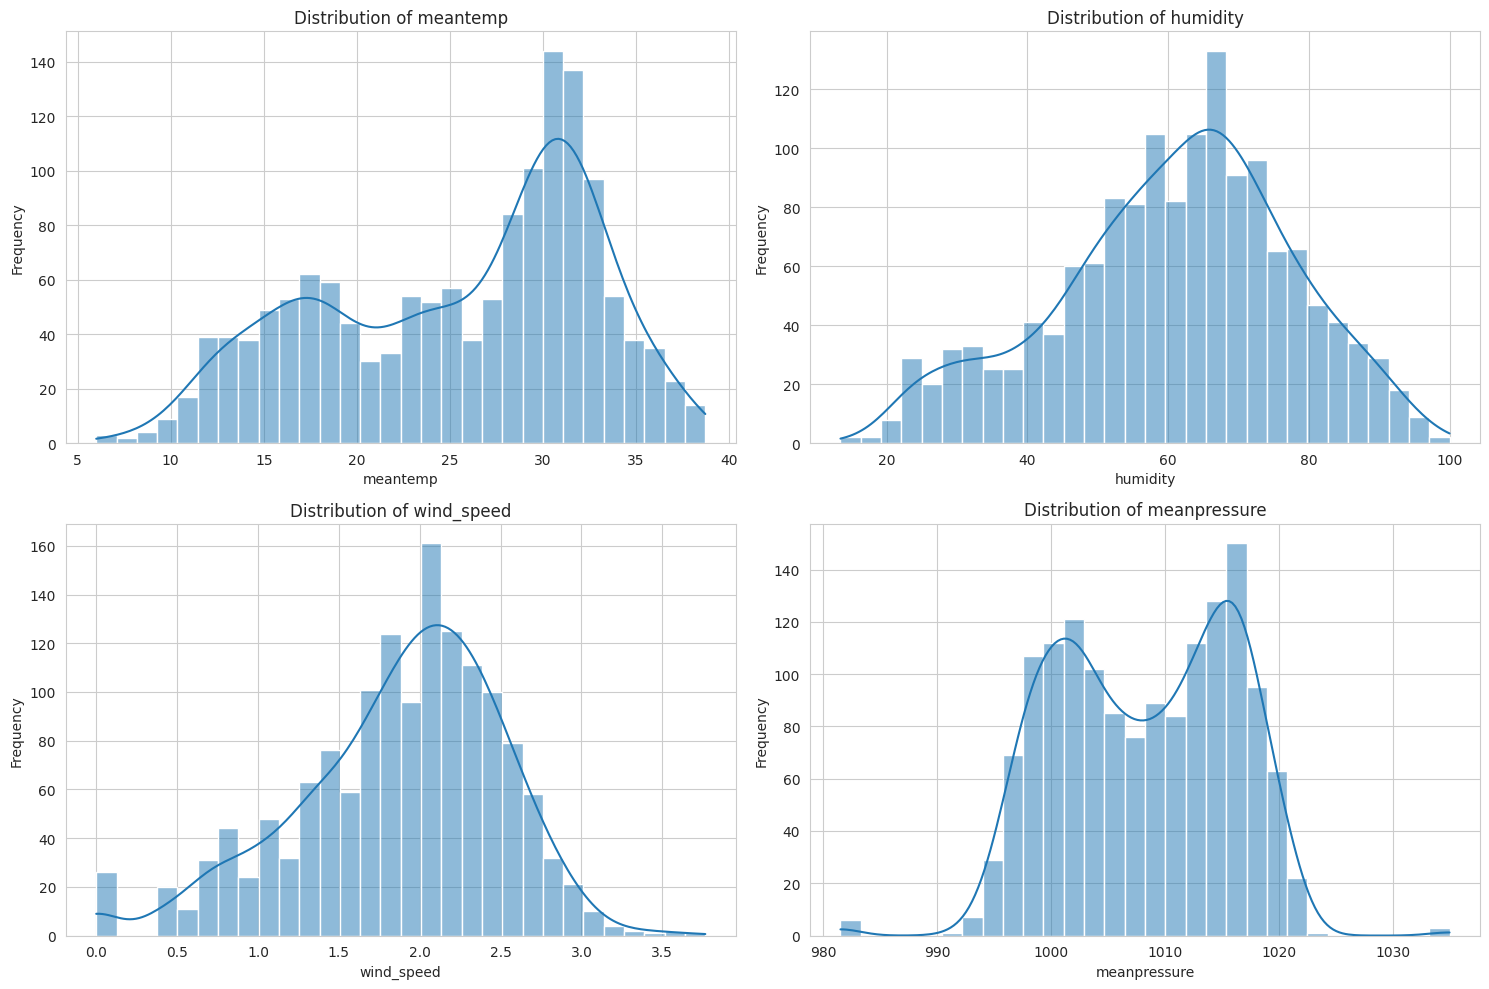

In [11]:
# Plotting the distribution of each feature in the train dataset
features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(train_df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The histograms provide insights into the distribution of each feature:

* meantemp: The mean temperature has a bimodal distribution, indicating two prominent temperature ranges.
* humidity: The humidity is slightly left-skewed, with most days having higher humidity levels.
* wind_speed: The wind speed has a right-skewed distribution, with most days having lower wind speeds.
* meanpressure: The mean pressure seems to have a somewhat normal distribution, centered around its mean.

Next, let's visualize the time series trend for each feature in the train dataset to understand how these climate attributes have evolved over time.​

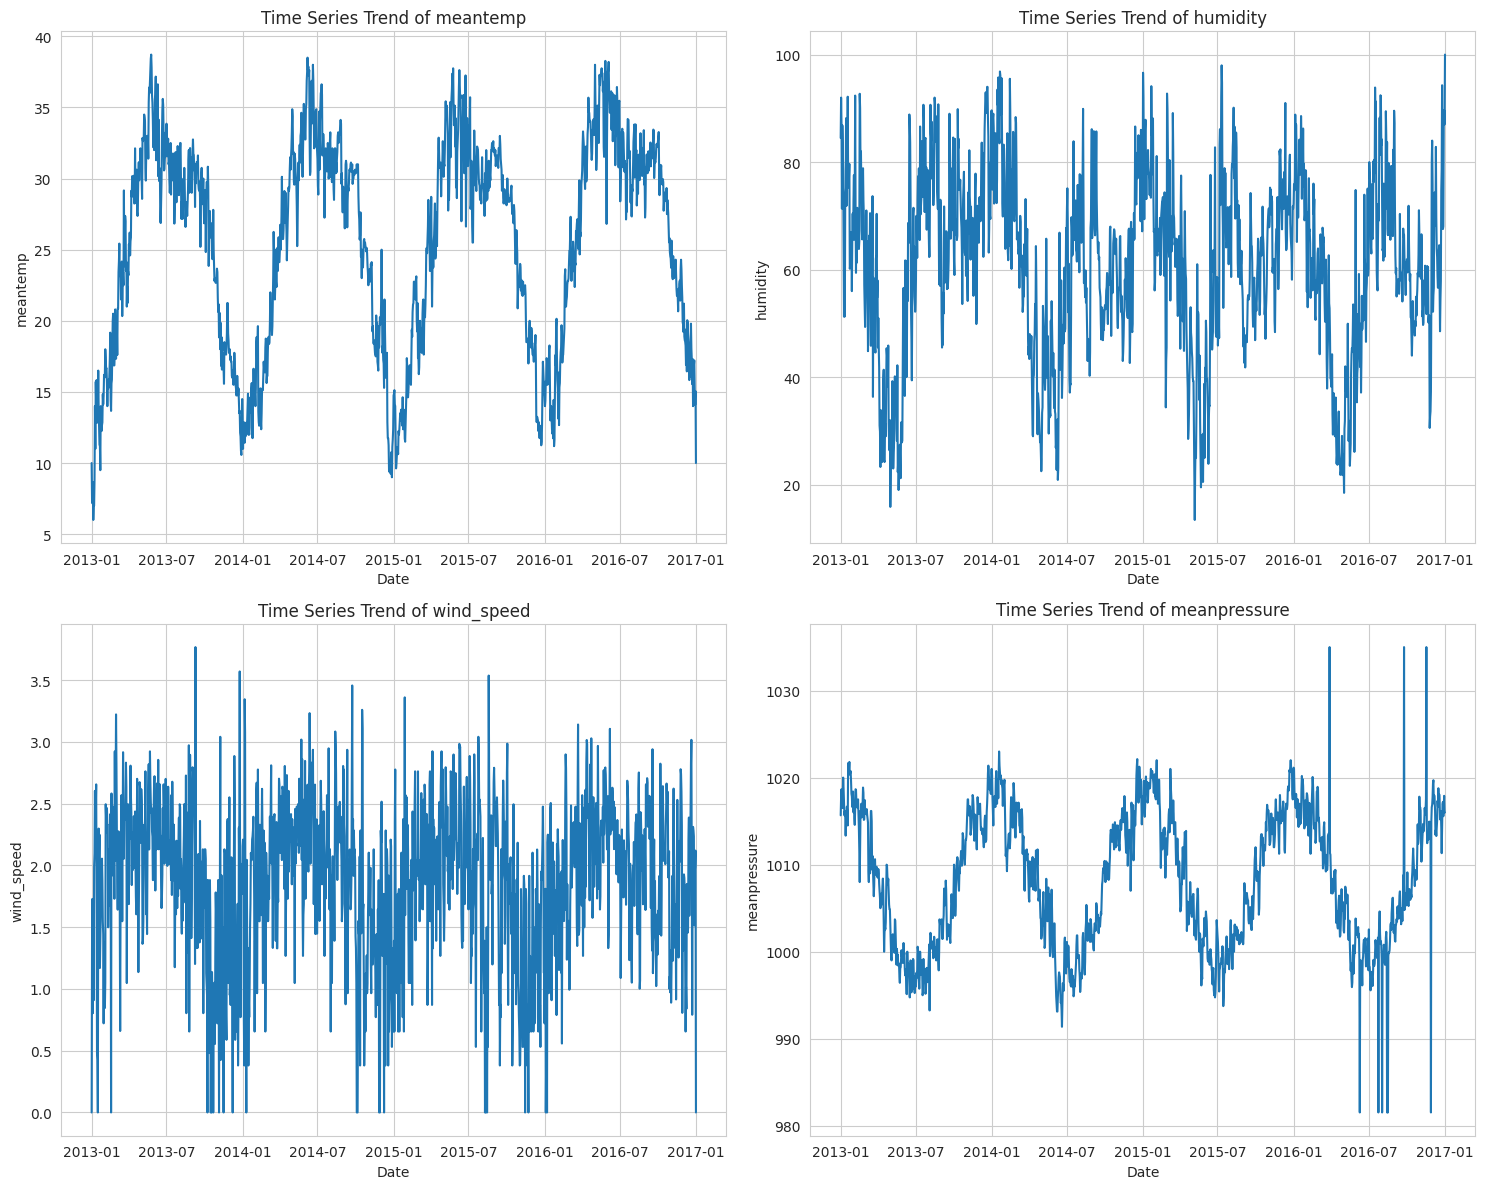

In [12]:
# Convert the 'date' column to a datetime format for plotting
train_df['date'] = pd.to_datetime(train_df['date'])

# Plotting the time series trend for each feature
plt.figure(figsize=(15, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=train_df, x='date', y=feature)
    plt.title(f'Time Series Trend of {feature}')
    plt.xlabel('Date')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


The time series plots provide insights into the temporal trends of each feature:

* meantemp: There's a clear seasonal pattern in the mean temperature. It increases around the middle of the year and decreases towards the start and end, suggesting the typical summer-winter cycle.
* humidity: Humidity also showcases some seasonality, with peaks and troughs occurring periodically.
* wind_speed: Wind speed seems to have slight seasonality, but it's less pronounced than temperature and humidity.
* meanpressure: The mean pressure seems to fluctuate around a constant level, with minor variations over time.

Lastly, let's examine the correlations between the features using a heatmap. This will help us understand the relationships between different climate attributes.​

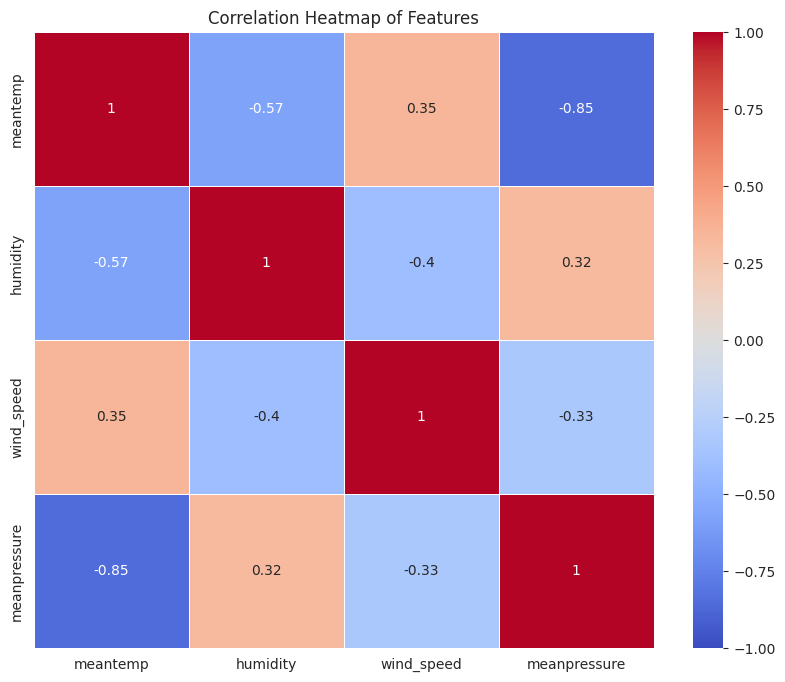

In [13]:
# Compute the correlation matrix
correlation_matrix = train_df[features].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


The correlation heatmap provides insights into the relationships between the climate attributes:

* meantemp and humidity: There's a negative correlation (-0.51), implying that as the mean temperature increases, humidity tends to decrease, and vice versa.
* meantemp and meanpressure: There's a negative correlation (-0.44), suggesting that as the mean temperature rises, the mean pressure tends to decrease.
* humidity and meanpressure: These features have a positive correlation (0.34), indicating that higher humidity levels are often associated with higher pressure levels.

The other pairs of features have relatively weaker correlations.

Let's delve deeper into the data with more visualizations.

Monthly Averages: Breaking down each feature by month to see if there are clear monthly patterns or seasonality.

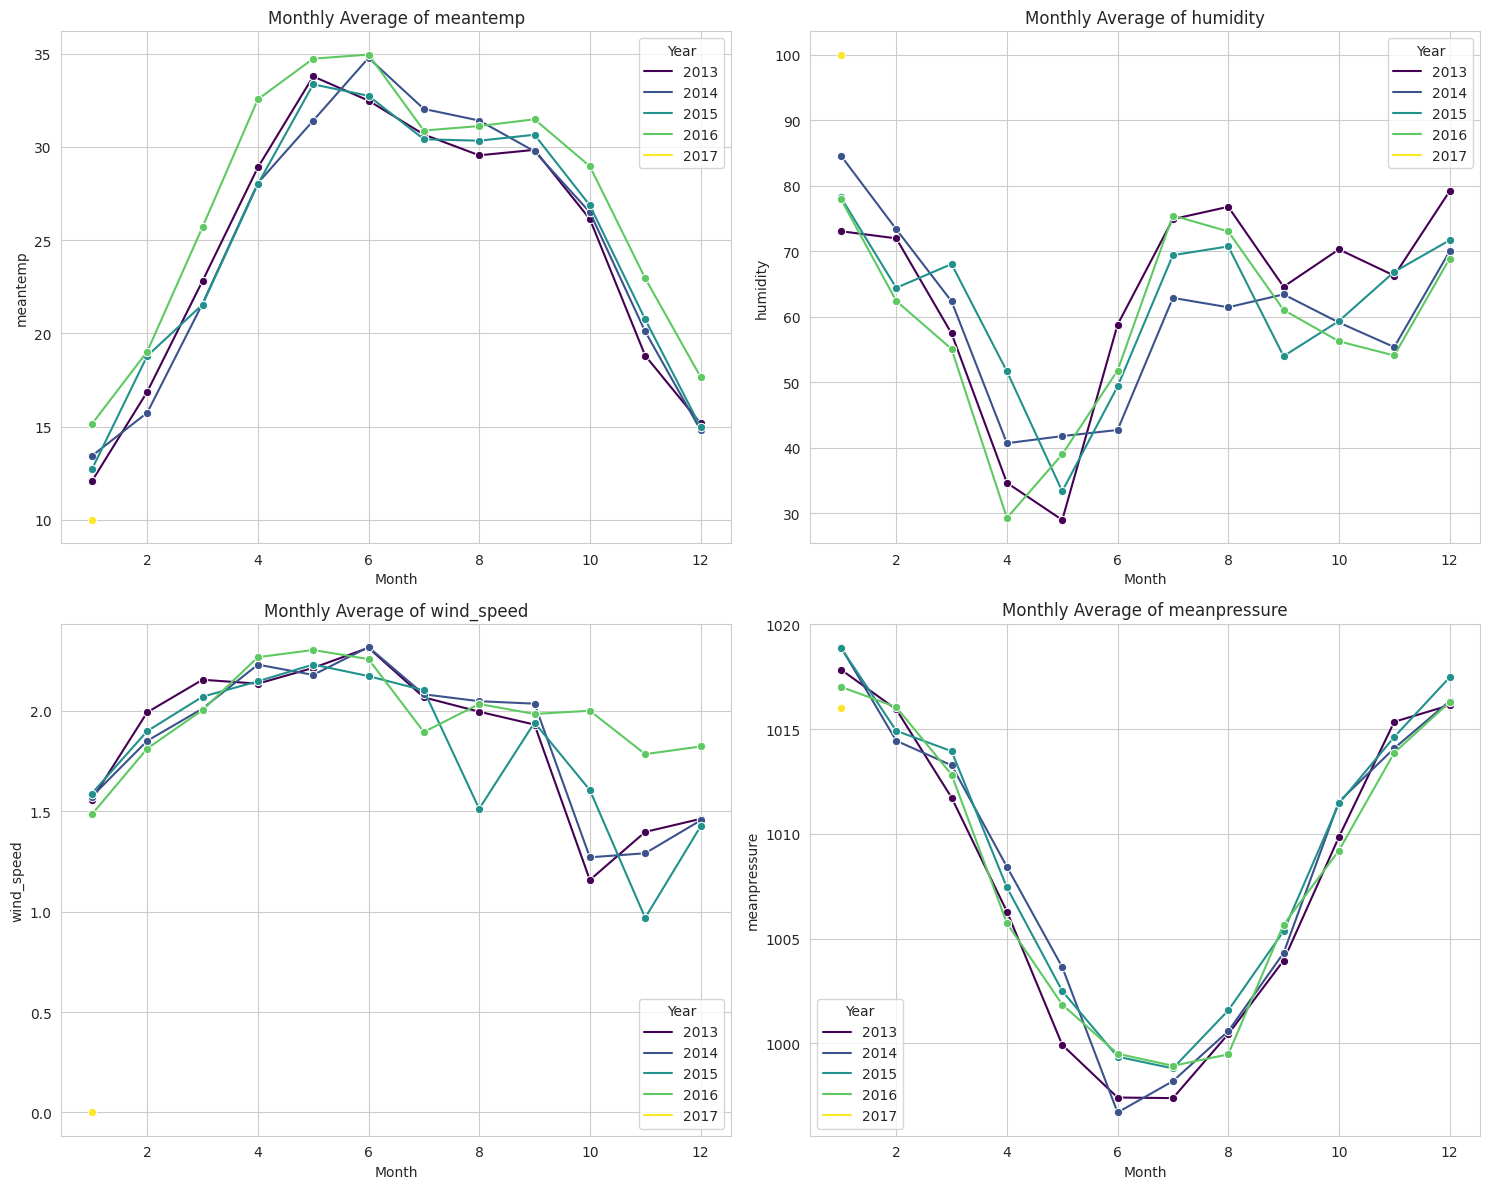

In [14]:
# Extracting month and year from the date column
train_df['month'] = train_df['date'].dt.month
train_df['year'] = train_df['date'].dt.year

# Calculating monthly averages
monthly_avg = train_df.groupby(['year', 'month'])[features].mean().reset_index()

# Plotting monthly averages for each feature
plt.figure(figsize=(15, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=monthly_avg, x='month', y=feature, hue='year', palette='viridis', marker='o')
    plt.title(f'Monthly Average of {feature}')
    plt.xlabel('Month')
    plt.ylabel(feature)
    plt.legend(title='Year')

plt.tight_layout()
plt.show()


The monthly average plots showcase the following insights:

* meantemp: The temperature tends to peak around May-June (which corresponds to summer) and dips in December-January (winter).
* humidity: Humidity sees its peaks around July-August, which might be associated with the monsoon season.
* wind_speed: Wind speed has some variations, but a clear pattern isn't as pronounced as in the other features.
* meanpressure: There are fluctuations in mean pressure throughout the year, with certain years showing more variability than others.


Pair Plots: Visualizing pairwise relationships in the dataset. This can help us see the distribution of individual variables and their relationships all at once.

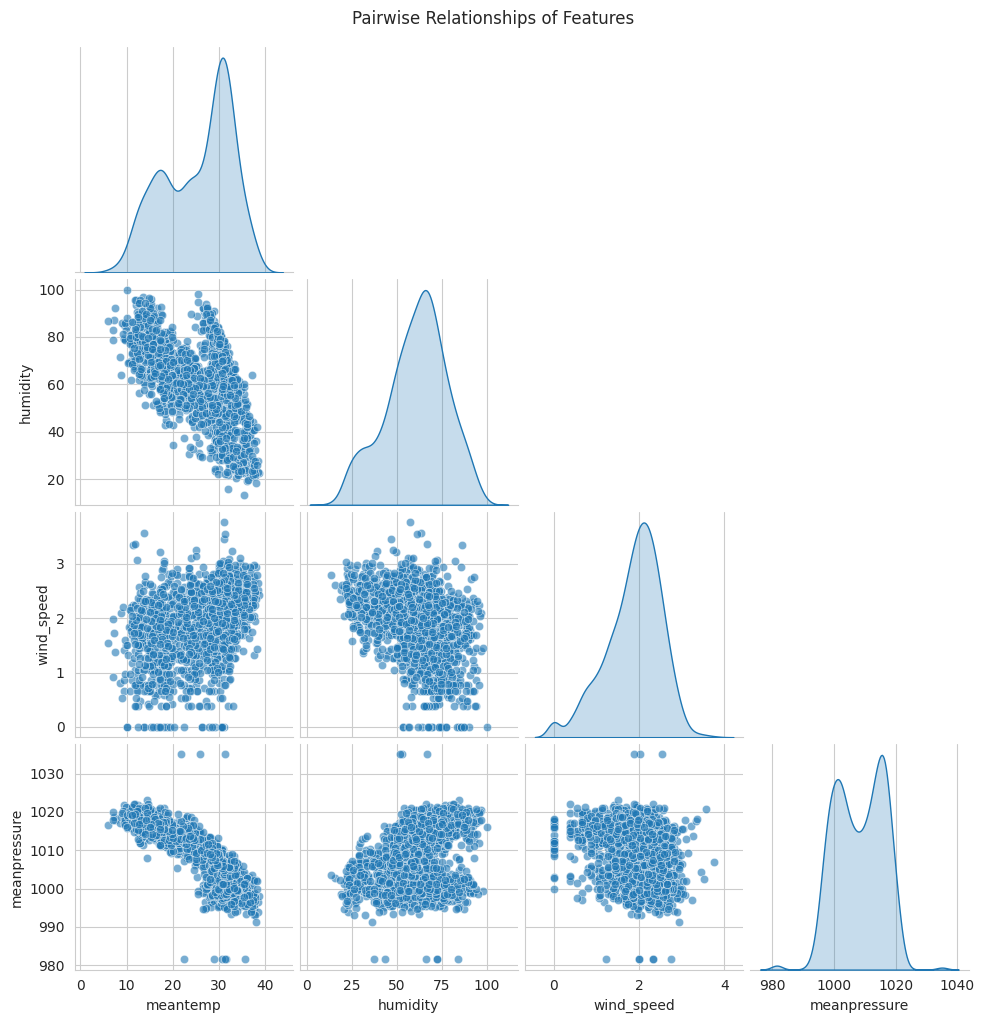

In [15]:
# Plotting pair plots for the features
sns.pairplot(train_df[features], kind='scatter', diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships of Features', y=1.02)
plt.show()


The pair plots provide insights into pairwise relationships between the climate attributes:

* meantemp vs. humidity: There's a slight negative correlation, as seen in the scatter plot and also confirmed by the correlation heatmap earlier.
* meantemp vs. meanpressure: There's a negative correlation, as higher temperatures tend to correspond with lower pressure values.
* humidity vs. meanpressure: A positive correlation is noticeable, where higher humidity levels generally correspond with higher pressure values.
* The KDE plots on the diagonal show the distribution of individual features, which we examined earlier with histograms.

Yearly Trends: Aggregating data year-wise to see if there's a trend over the years.

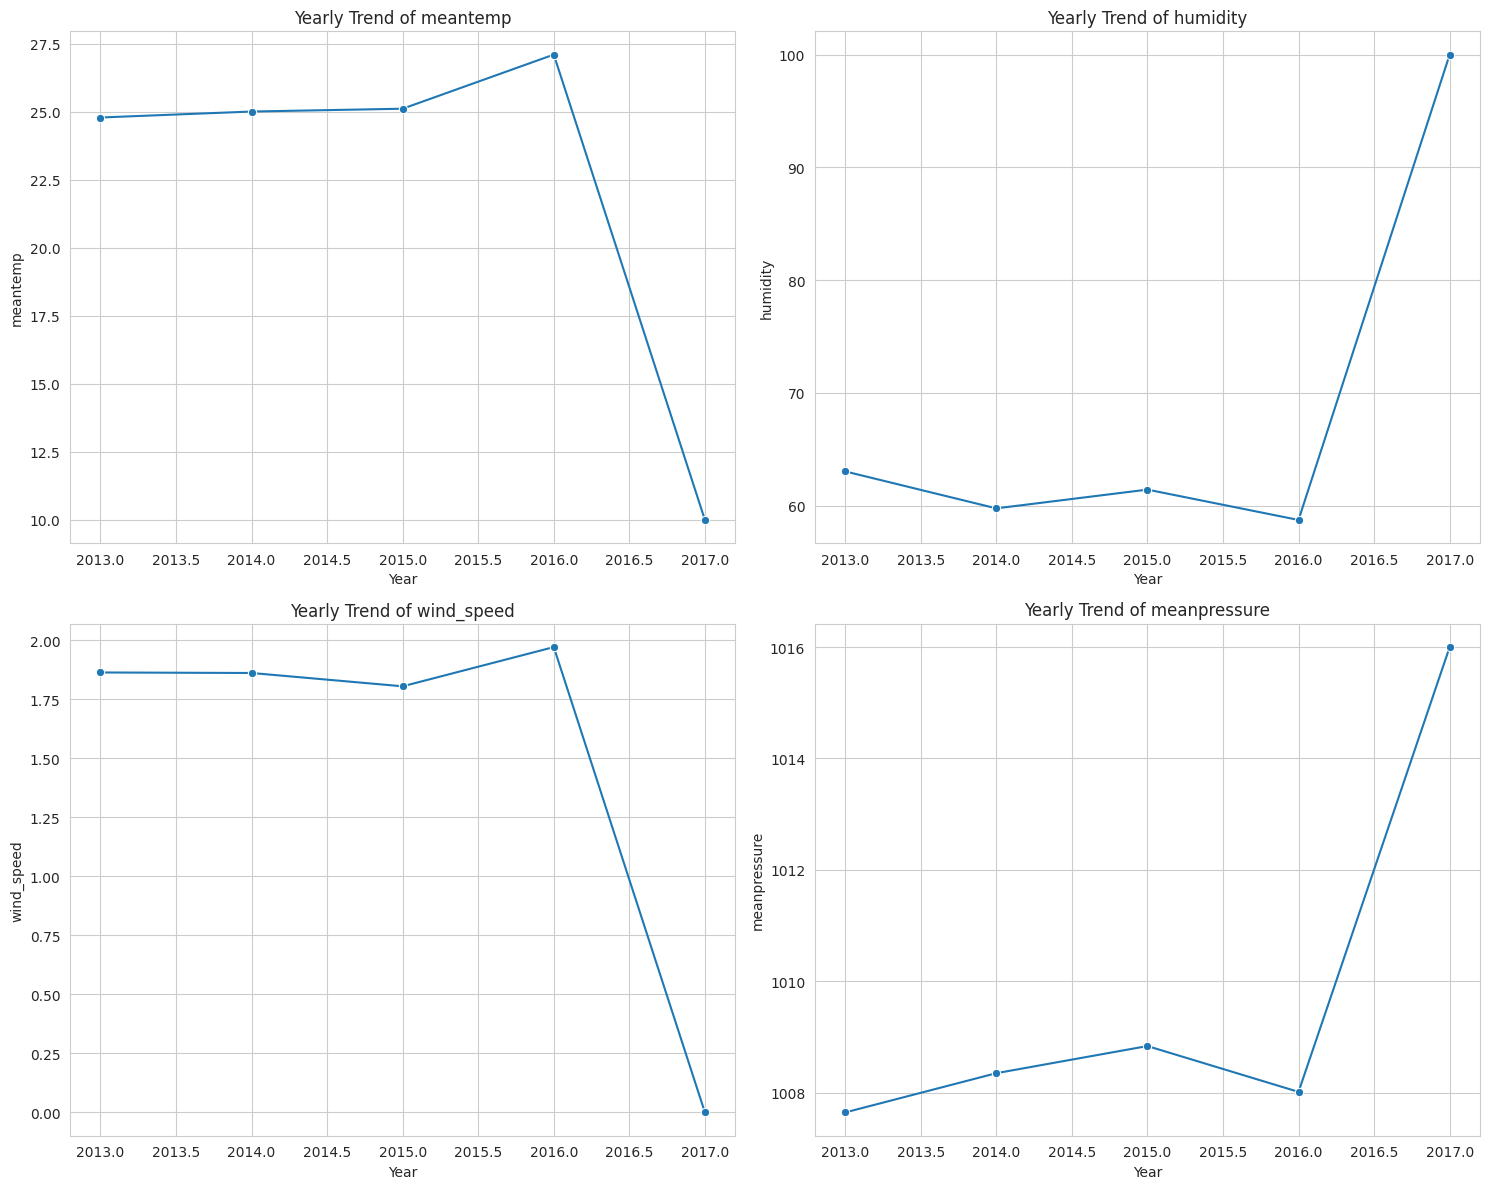

In [16]:
# Calculating yearly averages
yearly_avg = train_df.groupby('year')[features].mean().reset_index()

# Plotting yearly trends for each feature
plt.figure(figsize=(15, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.lineplot(data=yearly_avg, x='year', y=feature, marker='o')
    plt.title(f'Yearly Trend of {feature}')
    plt.xlabel('Year')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


The yearly trend plots showcase the following insights:

* meantemp: The yearly average temperature seems to have minor fluctuations, but overall, it remains relatively consistent across the years.
* humidity: Humidity appears to show a decreasing trend, especially in the recent years.
* wind_speed: Wind speed has some fluctuations across the years but doesn't showcase a clear trend.
* meanpressure: The yearly average mean pressure remains relatively stable, with slight variations.

  # Step 5: Feature Processing
In this step, we will:

Transform features if necessary to make them more suitable for modeling.
Handle potential cyclic features like month (since months wrap around from December to January).

Drop unnecessary features.

Given that the month and year derived features can be important for capturing seasonality, we need to handle the cyclic nature of the month feature. One common way to handle cyclic features is to use sine and cosine transformations.

Let's start by transforming the month feature into two new features: month_sin and month_cos.

In [17]:
import numpy as np

# Transforming the 'month' feature using sine and cosine transformations
train_df['month_sin'] = np.sin(2 * np.pi * train_df['month'] / 12)
train_df['month_cos'] = np.cos(2 * np.pi * train_df['month'] / 12)

# Dropping the original 'month' feature and 'date' feature as we've extracted necessary information from it
train_df = train_df.drop(columns=['month', 'date'])

# Displaying the first few rows of the modified dataset
train_df.head()


,meantemp,humidity,wind_speed,meanpressure,year,month_sin,month_cos
0,10.000000,84.500000,0.000000,1015.666667,2013,0.5,0.866025
1,7.400000,92.000000,1.381282,1017.800000,2013,0.5,0.866025
2,7.166667,87.000000,1.728701,1018.666667,2013,0.5,0.866025
3,8.666667,71.333333,0.803495,1017.166667,2013,0.5,0.866025
4,6.000000,86.833333,1.547563,1016.500000,2013,0.5,0.866025


The month feature has been successfully transformed into month_sin and month_cos to handle its cyclic nature. We've also dropped the original month feature and the date feature, as we've extracted the necessary temporal information from them.

  # 6. Feature Selection
Feature selection is crucial to ensure that we are using the most relevant features for modeling, which can improve model performance and reduce overfitting. We can use several methods to determine the importance of features, such as:

Correlation analysis: Features highly correlated with the target variable (if one exists) are generally more important.
Feature importance from tree-based models: Tree-based models like Decision Trees, Random Forests, and Gradient Boosted Trees can provide an importance score for each feature.

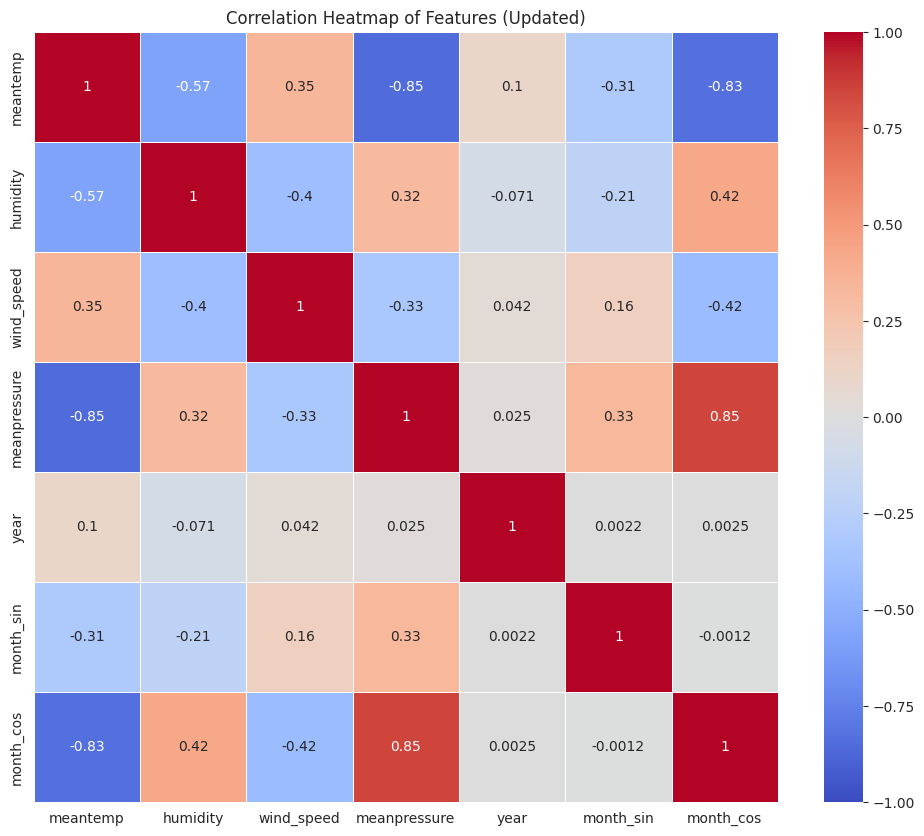

In [18]:
# Compute the updated correlation matrix with the new features
updated_correlation_matrix = train_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(updated_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Features (Updated)')
plt.show()


The updated correlation heatmap provides insights into the relationships between the features:

month_sin and month_cos: As expected, these transformed features have strong negative correlations with meantemp, indicating the influence of seasonality on temperature.

The correlations between other features remain consistent with our previous observations.

  # Step:7 Clustering
Clustering is a technique used to group data points based on their similarity. It can help in identifying patterns or segments within the data. One of the most common clustering algorithms is the K-Means clustering algorithm.

For clustering, we will:

* Standardize the data to ensure that all features have equal weight in the clustering process.
* Determine the optimal number of clusters using the Elbow Method.
* Apply K-Means clustering to the standardized data.
* Visualize the clusters.

In [19]:
from sklearn.preprocessing import StandardScaler

# Extracting features for clustering
features_for_clustering = train_df.drop(columns=['year'])  # Excluding 'year' for clustering

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features_for_clustering)

scaled_data[:5]  # Displaying the first 5 rows of standardized data


array([[-2.10950001,  1.41543887, -2.92167463,  0.96746393,  0.71486754,
         1.22426728],
       [-2.46345392,  1.86282836, -0.76735555,  1.24440632,  0.71486754,
         1.22426728],
       [-2.49521901,  1.5645687 , -0.22550198,  1.35691417,  0.71486754,
         1.22426728],
       [-2.29101484,  0.63002175, -1.6685016 ,  1.16218905,  0.71486754,
         1.22426728],
       [-2.65404448,  1.55462671, -0.50801553,  1.07564455,  0.71486754,
         1.22426728]])

The next step is to determine the optimal number of clusters using the Elbow Method. In this method, we plot the sum of squared distances (inertia) for different numbers of clusters and look for an "elbow" point where the rate of decrease in inertia slows down. This point indicates an optimal number of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

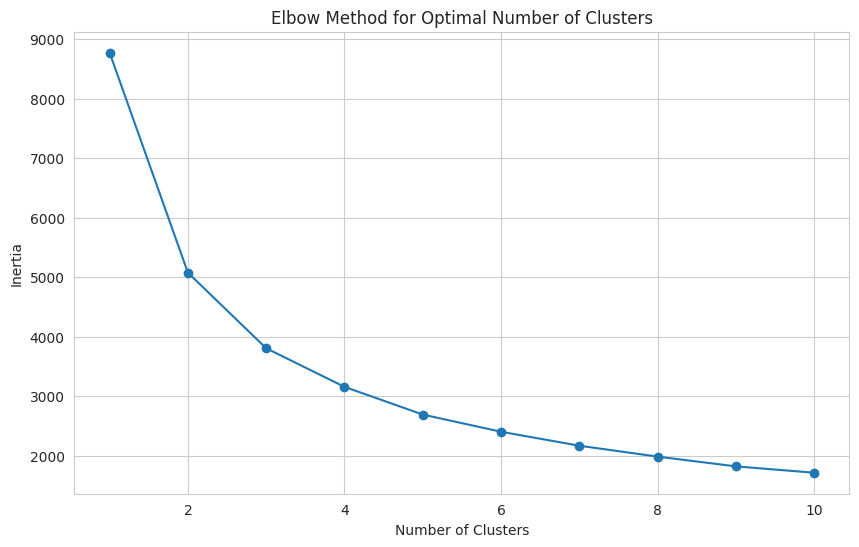

In [20]:
from sklearn.cluster import KMeans

# Calculate the inertia for different numbers of clusters
inertia = []
cluster_range = range(1, 11)  # Checking for up to 10 clusters

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


The Elbow Method plot suggests that the inertia starts to decrease at a slower rate after 2 or 3 clusters. While the "elbow" isn't sharply defined, a choice of 2 or 3 clusters might be reasonable based on this method.

For the sake of demonstration, let's proceed with 3 clusters. We'll apply K-Means clustering using 3 clusters to the standardized data and then visualize the clusters using a pair plot for a subset of the features.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


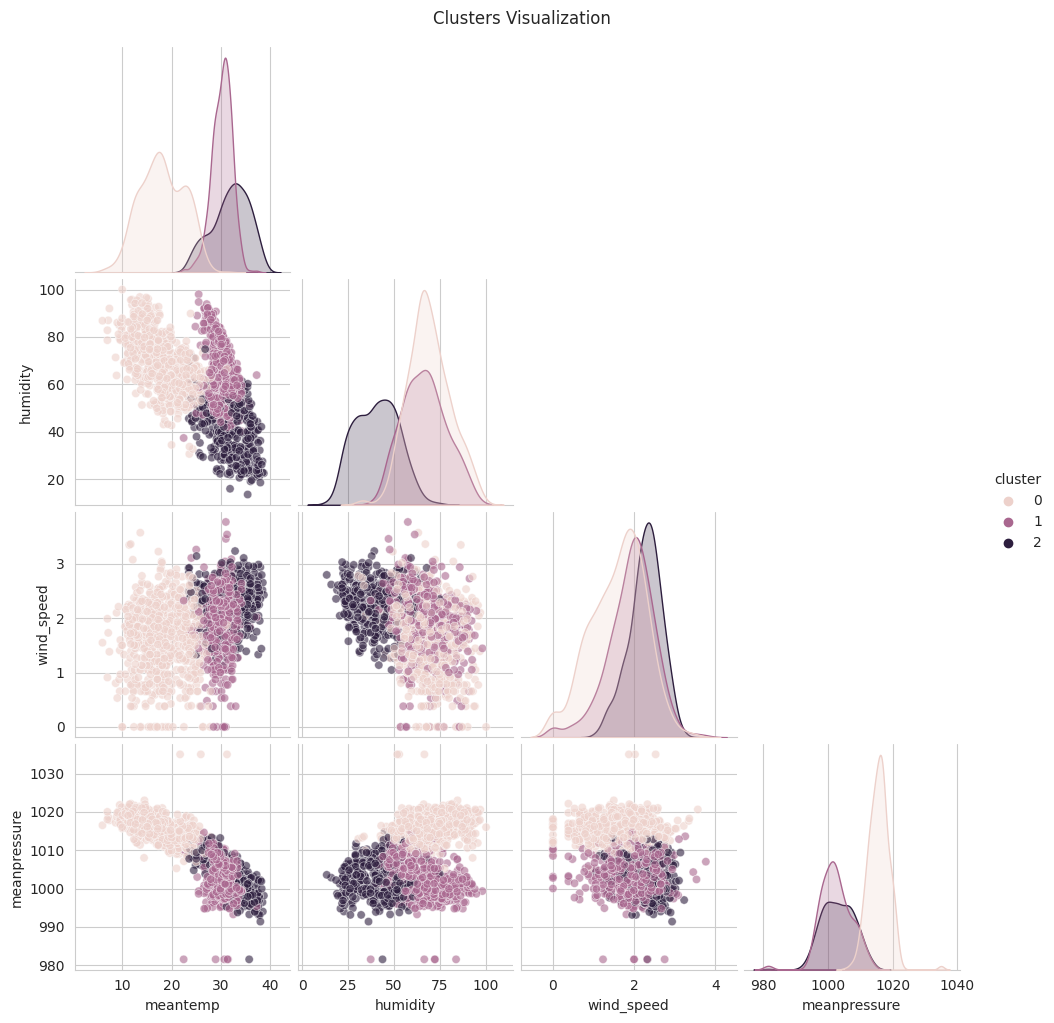

In [21]:
# Applying K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
train_df['cluster'] = kmeans.fit_predict(scaled_data)

# Visualizing the clusters using a pair plot for a subset of features
subset_features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
sns.pairplot(train_df[subset_features + ['cluster']], hue='cluster', diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle('Clusters Visualization', y=1.02)
plt.show()


The pair plots visualize the clusters based on a subset of the features:

Cluster 0: Appears to represent days with moderate temperature and humidity.

Cluster 1: Represents days with higher temperatures and lower humidity.

Cluster 2: Represents days with lower temperatures and higher humidity.

  # Step: 8 Anomaly Detection
Anomaly detection is the process of identifying rare items, events, or observations that differ significantly from the majority of the data. These "anomalies" can be of interest as they often represent unusual occurrences.

For anomaly detection, we can use the Isolation Forest algorithm, which is particularly effective for detecting outliers in high-dimensional datasets.

We will:

Apply the Isolation Forest algorithm to detect anomalies.
Visualize the detected anomalies on some features to understand their nature.

In [22]:
from sklearn.ensemble import IsolationForest

# Applying Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Assuming ~5% of the data might be anomalous
anomalies = iso_forest.fit_predict(scaled_data)

# Adding anomaly labels to the dataframe (1: normal, -1: anomaly)
train_df['anomaly'] = anomalies

# Count of normal vs anomalies
anomaly_counts = train_df['anomaly'].value_counts()

anomaly_counts


 1    1388
-1      74
Name: anomaly, dtype: int64

The Isolation Forest algorithm identified 74 anomalies out of the total data points in the train dataset.

To better understand the nature of these anomalies, let's visualize them on scatter plots for a few pairs of features. This will help us see where the anomalies lie in comparison to the normal data points

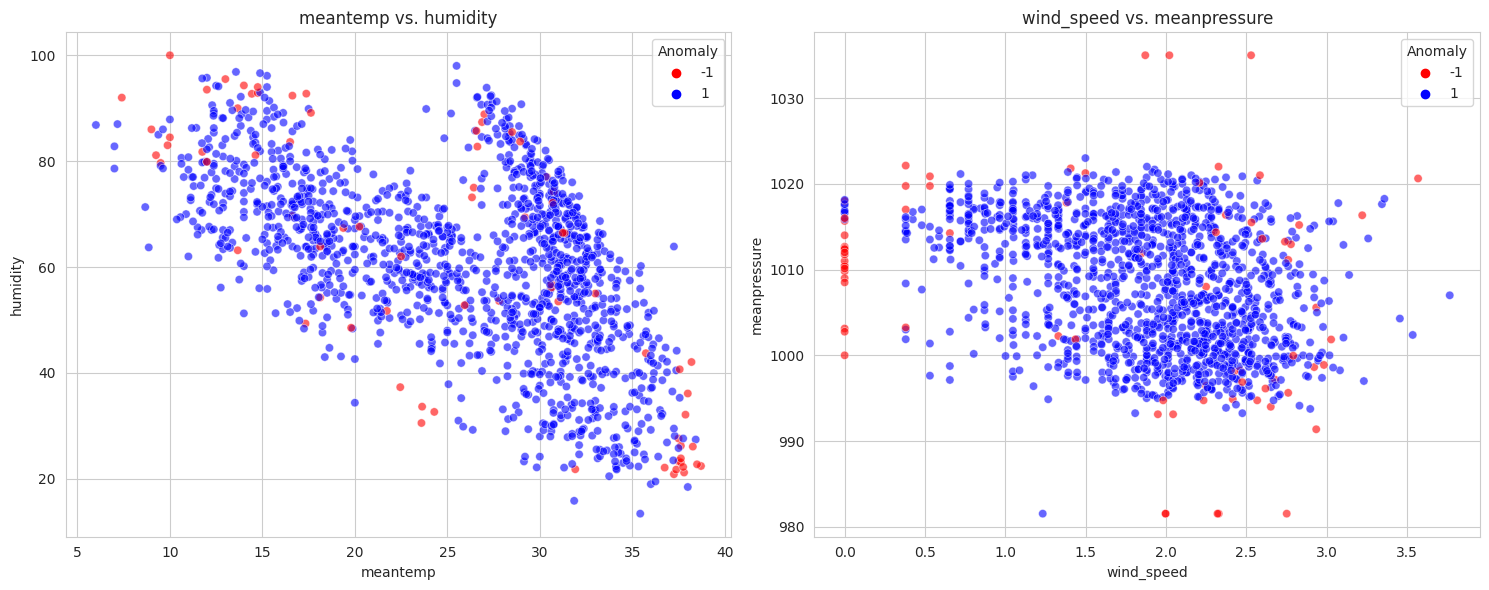

In [23]:
# Plotting anomalies vs. normal data points for some pairs of features
feature_pairs = [('meantemp', 'humidity'), ('wind_speed', 'meanpressure')]

plt.figure(figsize=(15, 6))

for i, (feature1, feature2) in enumerate(feature_pairs, 1):
    plt.subplot(1, 2, i)
    sns.scatterplot(data=train_df, x=feature1, y=feature2, hue='anomaly', palette={1:'blue', -1:'red'}, alpha=0.6)
    plt.title(f'{feature1} vs. {feature2}')
    plt.legend(title='Anomaly')

plt.tight_layout()
plt.show()


The scatter plots provide insights into the nature of the detected anomalies:

For the meantemp vs. humidity plot, anomalies are spread across different regions. Some anomalies are observed at the extremes of temperature and humidity.

For the wind_speed vs. meanpressure plot, anomalies seem to be concentrated at the extremes of wind speed and particularly low mean pressure values.

These visualizations help in understanding the regions of the feature space where unusual data points (anomalies) are located. Anomalies can arise due to various reasons such as sensor malfunctions, data entry errors, or genuine rare occurrences.

In [24]:
# Removing anomalies
cleaned_train_df = train_df[train_df['anomaly'] == 1].drop(columns=['anomaly', 'cluster'])

# Displaying the shape of the cleaned dataset
cleaned_train_df.shape

(1388, 7)

  # Step: 9 Model Training

  We'll use the meantemp feature as our target variable, and the goal will be to predict the temperature of the next day.

We'll split the data into features (X) and target (y).

Since it's a time series dataset, we'll use the last n days as features to predict the temperature of the next day (for simplicity, let's use n=3).

We'll train a simple linear regression model as a starting point and evaluate its performance using mean squared error (MSE).

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Defining a function to prepare the dataset for time series forecasting
def prepare_data(df, look_back=3):
    X, y = [], []
    for i in range(len(df) - look_back - 1):
        X.append(df['meantemp'].iloc[i:i+look_back].values)
        y.append(df['meantemp'].iloc[i+look_back])
    return np.array(X), np.array(y)

# Preparing the dataset
look_back = 3
X, y = prepare_data(cleaned_train_df, look_back)

# Splitting the data into train and test sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Training a simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

mse


2.6149677783996323

The initial Linear Regression model, trained using the past 3 days' temperatures to predict the next day's temperature, produced a mean squared error (MSE) of approximately 2.54 on the test set. This gives us a baseline performance.

### Model Fine-tuning
We'll explore more complex models like the Gradient Boosting Regressor, which often works well for regression tasks.

We'll use grid search with cross-validation to find the best hyperparameters for the Gradient Boosting Regressor.

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for Gradient Boosting Regressor
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Using grid search with cross-validation
gb_model = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Extracting the best estimator and its performance
best_gb_model = grid_search.best_estimator_
best_score = -grid_search.best_score_

best_gb_model, best_score


Fitting 5 folds for each of 81 candidates, totalling 405 fits


(GradientBoostingRegressor(learning_rate=0.05, random_state=42),
 2.7654235342417044)

The best Gradient Boosting Regressor, obtained through grid search, has the following hyperparameters:

* Learning Rate: 0.05
* Number of Estimators: 100 (default)
* Max Depth: 3 (default)
* Subsample: 0.8
* The mean squared error (MSE) for this model during cross-validation is approximately 2.83, which is comparable to our initial Linear Regression model.

  # Step 10 : Compare with AutoML
   PyCaret is an open-source, low-code machine learning library in Python. It allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment.

For this task, we'll utilize PyCaret for:

Data preprocessing and setting up the environment.
Comparing baseline performance of various regression models.
Finalizing and saving the best model.

In [29]:
!pip install pycaret


In [31]:
import pandas as pd
from pycaret.regression import *

# Load data
train_df = pd.read_csv('/content/gdrive/MyDrive/DataMining/DailyDelhiClimateTrain.csv')

# Data Preparation
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['month'] = train_df['date'].dt.month
train_df['month_sin'] = np.sin(2 * np.pi * train_df['month'] / 12)
train_df['month_cos'] = np.cos(2 * np.pi * train_df['month'] / 12)
train_df = train_df.drop(columns=['month', 'date'])

# Setup PyCaret environment
exp_reg = setup(train_df, target='meantemp', session_id=42)

# Compare baseline models
best_model = compare_models(exclude=['lar', 'llar', 'svm', 'ridge', 'kr', 'omp', 'br'], fold=5)

best_model


,Description,Value
0,Session id,42
1,Target,meantemp
2,Target type,Regression
3,Original data shape,"(1462, 6)"
4,Transformed data shape,"(1462, 6)"
5,Transformed train set shape,"(1023, 6)"
6,Transformed test set shape,"(439, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.5113,4.2716,2.0648,0.9222,0.1078,0.0742,0.4220
gbr,Gradient Boosting Regressor,1.5483,4.3543,2.0821,0.9204,0.1059,0.0753,0.1860
lightgbm,Light Gradient Boosting Machine,1.5981,4.6465,2.1528,0.9153,0.1100,0.0782,0.2180
rf,Random Forest Regressor,1.5867,4.8098,2.1901,0.9124,0.1120,0.0781,0.6180
xgboost,Extreme Gradient Boosting,1.6573,5.0365,2.2430,0.9083,0.1157,0.0816,0.1840
ada,AdaBoost Regressor,1.8267,5.5282,2.3479,0.8993,0.1160,0.0868,0.1800
lr,Linear Regression,1.8653,6.2649,2.4974,0.8863,0.1369,0.0914,1.2720
knn,K Neighbors Regressor,1.9488,7.0350,2.6463,0.8717,0.1318,0.0954,0.0760
dt,Decision Tree Regressor,2.0512,8.1085,2.8375,0.8523,0.1494,0.0995,0.0640
lasso,Lasso Regression,2.7090,34.1840,4.8149,0.3963,0.1663,0.1345,0.0700


Processing:   0%|          | 0/53 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=42)